In [17]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

### Example: Independence

We start today with an example of a joint distribution:

$$ f(y_1, y_2) = C e^{-y_1^2 - y_2^2} $$

Show that $Y_1$ and $Y_2$ with this density will be independent.


### Example: Dependence

Now consider 

$$ f(y_1, y_2) = C e^{-y_1^2 - y_2^2 - 1.25 y_1 y_2 }  $$

Compute (approximately) the value of C needed to make this a valid density function and then show that $Y_1$ and $Y_2$ with this density are dependent.



### Example: Dependent Variables Expected Value

Compute the expected value of $Y_1 Y_2$ for the density function $f(y_1, y_2)$ above.

### Example: Independent Variables Expected Value

Note that in the case of indepedent variables: $f(y_1, y_2) = f_1(y_1) f_2(y_2)$ show that $$ E( Y_1 Y_2) = E(Y_1) E(Y_2)$$

More generally for independent variables:

$$ E( g(Y_1) h(Y_2) ) = E( g(Y_1) ) E( h(Y_2) ) $$

# Sampling Dependent Random Variables

Note that sampling independent random variables is easy, we just sample each one separately.

Sampling dependent random variables is a hard problem (that is not completely solved at this point - there is research for YOU to do here!!!!)

We'll see today what is called the **Metropolis Algorithm** which does a resonably good job and runs fast enough.



In [13]:
f = lambda y1, y2: np.exp(-y1**2 - y2**2 - 1.25 *y1 *y2 )
C = integrate.dblquad(f, -20, 20, lambda x2: -20, lambda x2: 20)[0]
C

4.02445945301314

In [14]:
f = lambda y1, y2: np.exp(-y1**2 -y2**2 - 1.25 *y1 *y2)/C

In [15]:
# let's plot this distribution first

delta = 0.025
x1 = np.arange(-2.0, 2.0, delta)
x2 = np.arange(-2.0, 2.0, delta)
xx1, xx2 = np.meshgrid(x1, x2)
n1, n2 = xx1.shape

ZZ = []
for k1 in range(n1):
    temp = []
    for k2 in range(n2):
        temp += [ f(xx1[k1, k2], xx2[k1, k2]) ]
    ZZ += [temp ]

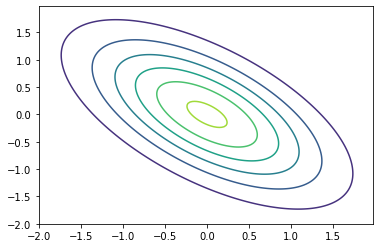

In [18]:
plt.contour(xx1, xx2, ZZ)

Our goal would be to produce a sequence of values whose distribution will match this one.

